In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df= pd.read_csv("student-por.csv")


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
df["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [12]:
df["internet"]

0       no
1      yes
2      yes
3      yes
4       no
      ... 
644    yes
645    yes
646     no
647    yes
648    yes
Name: internet, Length: 649, dtype: object

In [13]:
df["Gtotal"] = df["G1"]+ df["G2"]+ df["G3"]

In [14]:
df["Gtotal"]

0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Name: Gtotal, Length: 649, dtype: int64

In [26]:
X = df[["studytime","traveltime"]]
y = df["Gtotal"]
X.shape

(649, 2)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled.shape

(519, 2)

In [32]:
X_test.shape

(130, 2)

In [31]:
X_test_scaled.shape

(130, 2)

# 🔄 `fit_transform()` vs `transform()`: The Golden Rule

Knowing the difference prevents **Data Leakage** (the biggest mistake in Data Science).

---

## 1. Analogy: The Tailor and the Suit 🧵
Imagine you go to a tailor.
* **Fit (Learning):** The tailor takes your measurements with a tape. (The model learns the Mean and Standard Deviation).
* **Transform (Action):** The tailor cuts the fabric based on those measurements. (The model changes the data).

---

## 2. Where to Use What? 🚦

| Dataset | Function to Use | Why? |
| :--- | :--- | :--- |
| **Train Set** | `.fit_transform()` | **Measure + Cut.** Learn the statistics (Mean/Std) from the training data AND apply them. |
| **Test Set** | `.transform()` | **Cut Only.** Do NOT take new measurements! Use the rules learned from the Train Set to scale the Test Set. |

---

## 3. The Fatal Error: Fitting the Test Set 🚫
If you use `.fit()` or `.fit_transform()` on `X_test`:

1.  The model learns the "answers" from the Test Set (cheating).
2.  Your accuracy score becomes artificially high.
3.  In the real world (Production), the model will fail.

---

## 💻 The Correct Code Pattern

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# ✅ STEP 1: Train Set -> FIT + TRANSFORM
# (Calculate the class average and grade the students)
X_train_scaled = scaler.fit_transform(X_train)

# ✅ STEP 2: Test Set -> TRANSFORM ONLY
# (Grade the new student using the OLD class average)
X_test_scaled = scaler.transform(X_test) 
# NEVER FIT THE TEST SET!

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_predi= model.predict(X_test_scaled)

<Figure size 800x600 with 0 Axes>

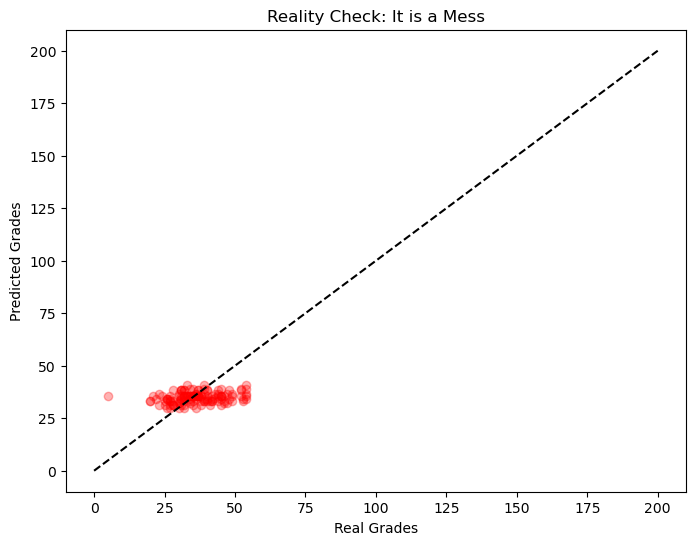

In [49]:
# The plot will look like a messy cloud because the model is confused.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predi, color='red', alpha=0.3)
plt.plot([0, 200], [0, 200], 'k--') # The Target Line
plt.xlabel("Real Grades")
plt.ylabel("Predicted Grades")
plt.title("Reality Check: It is a Mess")
plt.show()